In [99]:
import os
import random
import numpy as np
# Import PyTorch
import torch
from torch import nn

# OpenCV for image split
import cv2

# Import torchvision
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu117
0.15.2+cu117


## 1. Loading the Cityscapes dataset

In [100]:
train_folder="./data/cityscapes_data/train/"
valid_folder="./data/cityscapes_data/val/"

def get_images_masks(path):
    names=os.listdir(path)
    img_g,img_m=[],[]
    for name in names:
        img=cv2.imread(path+name)
        img=cv2.normalize(img,None,0,1,cv2.NORM_MINMAX,cv2.CV_32F)
        img=img[:,:,::-1]
        img_g.append(img[:,:256])
        img_m.append(img[:,256:]) # np.reshape(img[:,256:],(256*256*3))
        del img
    del names
    return img_g,img_m

train_imgs,train_masks=get_images_masks(train_folder)
valid_imgs,valid_masks=get_images_masks(valid_folder)

## 1.1 Visualizing the data

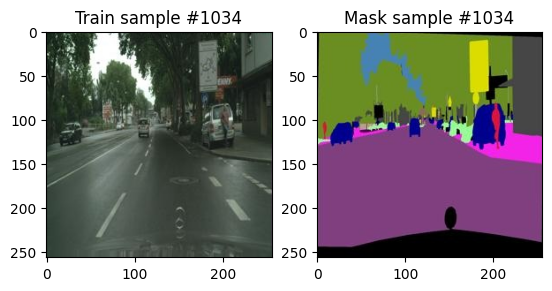

In [111]:
random_index = random.randint(0, len(train_imgs))
plt.subplot(1, 2, 1)
plt.title("Train sample #{id}".format(id = random_index))
plt.imshow(train_imgs[random_index])
plt.subplot(1, 2, 2)
plt.title("Mask sample #{id}".format(id = random_index))
plt.imshow(train_masks[random_index])